## Support Vector Machine
    It converts the input space(2D) into high dimensional space. it will be able to differentiate between the classes properly.
    • datapoints/vectors are converted into high dimensional space, a hyperplane is fit .
    • decision boundaries are drawn parallel to the hyperplanes. Each decision boundary must pass through 1 or more vectors of that class.
    • margin refers to the distance between both the decision boundaries.
    • distance from hyperplane to each decision boundary line is calculated.
    • the hyperplane that gives maximum distance, is considered as the final hyperplane.
    • how are input space 2D converted into high dimensional space: kernel

### Kernel:
A kernel in Support Vector Machines (SVM) is a function that enables linear classifiers to solve non-linear problems by implicitly mapping input data into higher-dimensional feature spaces. By calculating similarity between data points without explicitly transforming them, kernels (like RBF, Polynomial, or Sigmoid) find optimal, complex, or curved decision boundaries efficiently.

### kernel types:

Linear : Used for linearly separable data, Polynomial: Models feature interactions, Sigmoid: Related to neural networks, RBF Radial Basis Function : A popular default that handles infinite dimensions,

### Build a model that predicts Drug to be prescribed to the patient based upon their condition
#### Data Gathering

In [1]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
df.shape

(200, 6)

In [3]:

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    str    
 2   BP           200 non-null    str    
 3   Cholesterol  200 non-null    str    
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    str    
dtypes: float64(1), int64(1), str(4)
memory usage: 9.5 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Separate X and Y features

In [7]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


## Data Cleaning and Data Preprocessing

In [9]:

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = list(X.select_dtypes(include='str').columns)
con = list(X.select_dtypes(include='number').columns)

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794



## Splitting the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)

In [11]:
xtrain.shape

(150, 9)

In [12]:
xtest.shape

(50, 9)

## Model Building

In [13]:
from sklearn.svm import SVC # support vector classifier
model = SVC()
model.fit(xtrain,ytrain)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [14]:

model.score(xtrain,ytrain)

0.9933333333333333

In [15]:
model.score(xtest,ytest)

0.92


## Evaluation of the model

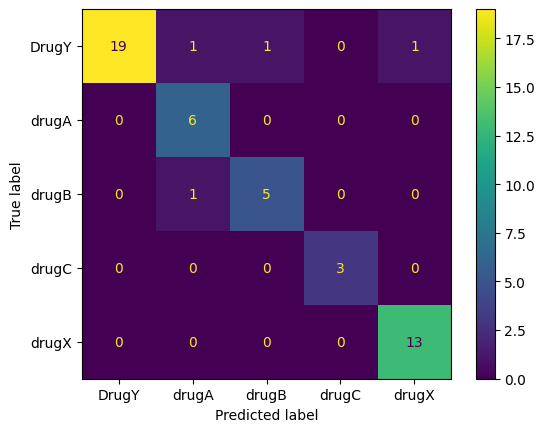

In [16]:
ypreds = model.predict(xtest)
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [17]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

       DrugY       1.00      0.86      0.93        22
       drugA       0.75      1.00      0.86         6
       drugB       0.83      0.83      0.83         6
       drugC       1.00      1.00      1.00         3
       drugX       0.93      1.00      0.96        13

    accuracy                           0.92        50
   macro avg       0.90      0.94      0.92        50
weighted avg       0.93      0.92      0.92        50



In [18]:
import joblib 
joblib.dump(pre,'pre.joblib')
joblib.dump(model,'model.joblib')

['model.joblib']

In [19]:
pre1 = joblib.load('pre.joblib')
m1 = joblib.load('model.joblib')

## Out of sample predictions

In [20]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [21]:
xnew_pre = pre1.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,-0.298088


In [22]:
final = m1.predict(xnew_pre)
final[:10]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX'], dtype=object)

In [23]:
xnew['Drug_Predictions'] = final

In [24]:
xnew.to_csv("Drug Predictions.csv",index=False)